<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

In [11]:
attrition = pd.read_csv('Employee-Attrition.csv')

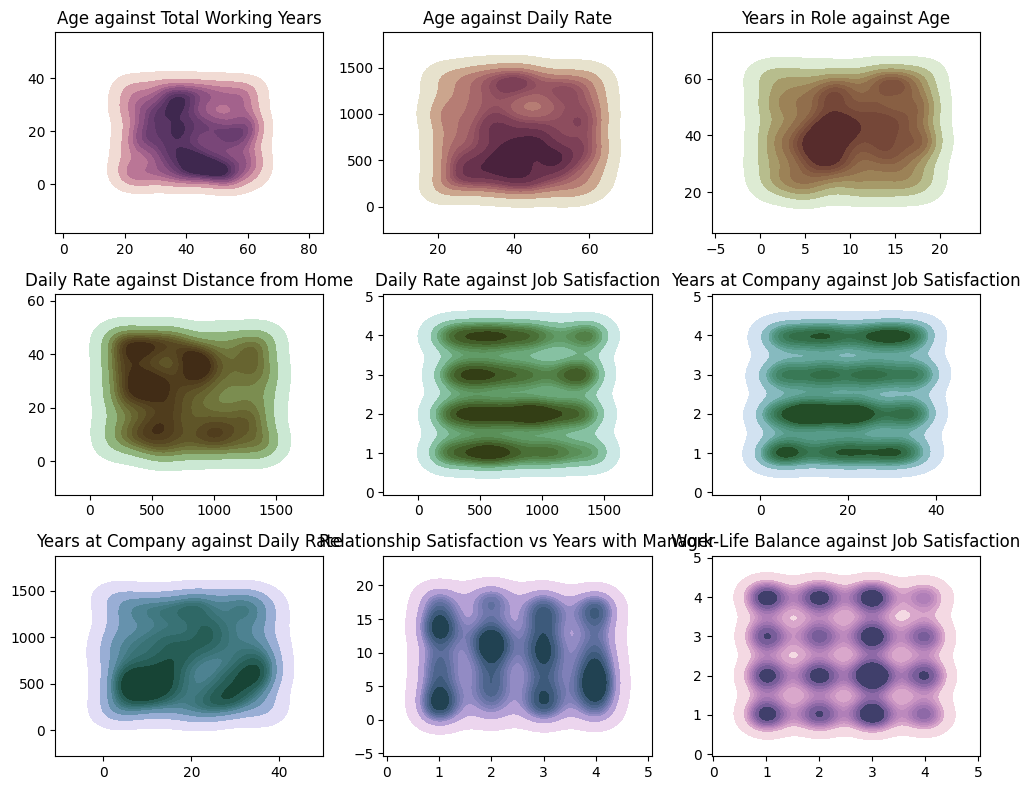

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Placeholder: Load your attrition dataset (replace with your actual data source)
# Example: attrition = pd.read_csv('path_to_your_attrition_data.csv')
# For demonstration, I'll create a dummy dataset
attrition = pd.DataFrame({
    'Age': np.random.randint(18, 65, 1000),
    'TotalWorkingYears': np.random.randint(0, 40, 1000),
    'DailyRate': np.random.randint(100, 1500, 1000),
    'YearsInCurrentRole': np.random.randint(0, 20, 1000),
    'DistanceFromHome': np.random.randint(1, 50, 1000),
    'JobSatisfaction': np.random.randint(1, 5, 1000),
    'YearsAtCompany': np.random.randint(0, 40, 1000),
    'RelationshipSatisfaction': np.random.randint(1, 5, 1000),
    'YearsWithCurrManager': np.random.randint(0, 20, 1000),
    'WorkLifeBalance': np.random.randint(1, 5, 1000)
})

# Create the subplot grid
f, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=False, sharey=False)

# Define colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Plot 1: Age vs TotalWorkingYears
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, cut=5, ax=axes[0,0])
axes[0,0].set(title='Age against Total Working Years')

# Plot 2: Age vs DailyRate
cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, ax=axes[0,1])
axes[0,1].set(title='Age against Daily Rate')

# Plot 3: YearsInCurrentRole vs Age
cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, ax=axes[0,2])
axes[0,2].set(title='Years in Role against Age')

# Plot 4: DailyRate vs DistanceFromHome
cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, ax=axes[1,0])
axes[1,0].set(title='Daily Rate against Distance from Home')

# Plot 5: DailyRate vs JobSatisfaction
cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, ax=axes[1,1])
axes[1,1].set(title='Daily Rate against Job Satisfaction')

# Plot 6: YearsAtCompany vs JobSatisfaction
cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, ax=axes[1,2])
axes[1,2].set(title='Years at Company against Job Satisfaction')  # Fixed title typo

# Plot 7: YearsAtCompany vs DailyRate
cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, ax=axes[2,0])
axes[2,0].set(title='Years at Company against Daily Rate')

# Plot 8: RelationshipSatisfaction vs YearsWithCurrManager
cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, ax=axes[2,1])
axes[2,1].set(title='Relationship Satisfaction vs Years with Manager')

# Plot 9: WorkLifeBalance vs JobSatisfaction
cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, ax=axes[2,2])
axes[2,2].set(title='Work-Life Balance against Job Satisfaction')

# Adjust layout
f.tight_layout()

# Display the plot
plt.show()

In [19]:
!pip install plotly

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)

# Placeholder: Load or define your attrition dataset
# Replace with your actual data source, e.g., attrition = pd.read_csv('path_to_data.csv')
# For demonstration, creating a dummy dataset
attrition = pd.DataFrame({
    'Attrition': np.random.choice(['Yes', 'No'], 1000),
    'Age': np.random.randint(18, 65, 1000),
    'DailyRate': np.random.randint(100, 1500, 1000),
    'DistanceFromHome': np.random.randint(1, 50, 1000),
    'Education': np.random.randint(1, 5, 1000),
    'EmployeeNumber': np.arange(1000),
    'EnvironmentSatisfaction': np.random.randint(1, 5, 1000),
    'HourlyRate': np.random.randint(30, 100, 1000),
    'JobInvolvement': np.random.randint(1, 5, 1000),
    'JobLevel': np.random.randint(1, 6, 1000),
    'JobSatisfaction': np.random.randint(1, 5, 1000),
    'MonthlyIncome': np.random.randint(1000, 20000, 1000),
    'MonthlyRate': np.random.randint(2000, 30000, 1000),
    'NumCompaniesWorked': np.random.randint(0, 10, 1000),
    'PercentSalaryHike': np.random.randint(10, 25, 1000),
    'PerformanceRating': np.random.randint(1, 5, 1000),
    'RelationshipSatisfaction': np.random.randint(1, 5, 1000),
    'StockOptionLevel': np.random.randint(0, 4, 1000),
    'TotalWorkingYears': np.random.randint(0, 40, 1000),
    'TrainingTimesLastYear': np.random.randint(0, 6, 1000),
    'WorkLifeBalance': np.random.randint(1, 5, 1000),
    'YearsAtCompany': np.random.randint(0, 40, 1000),
    'YearsInCurrentRole': np.random.randint(0, 20, 1000),
    'YearsSinceLastPromotion': np.random.randint(0, 15, 1000),
    'YearsWithCurrManager': np.random.randint(0, 20, 1000)
})

# Define a dictionary for the target mapping
target_map = {'Yes': 1, 'No': 0}
# Numerically encode the 'Attrition' target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

# List of numerical columns (removed unnecessary 'u' prefixes)
numerical = [
    'Age', 'DailyRate', 'DistanceFromHome',
    'Education', 'EmployeeNumber', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Create the heatmap data
data = [
    go.Heatmap(
        z=attrition[numerical].astype(float).corr().values,  # Pearson correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale=False,
        opacity=1.0
    )
]

# Define the layout
layout = go.Layout(
    title='Pearson Correlation of Numerical Features',
    xaxis=dict(ticks='', nticks=36),
    yaxis=dict(ticks=''),
    width=900,
    height=700
)
# Create and display the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

In [17]:
import pandas as pd
import numpy as np

# Placeholder: Define the attrition DataFrame (replace with your actual data)
# For demonstration, creating a dummy dataset
attrition = pd.DataFrame({
    'Attrition': np.random.choice(['Yes', 'No'], 1000),
    'Age': np.random.randint(18, 65, 1000),
    'DailyRate': np.random.randint(100, 1500, 1000),
    'DistanceFromHome': np.random.randint(1, 50, 1000),
    'Education': np.random.randint(1, 5, 1000),
    'Gender': np.random.choice(['Male', 'Female'], 1000),
    'JobRole': np.random.choice(['Sales', 'Research', 'HR'], 1000),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], 1000),
    'MonthlyIncome': np.random.randint(1000, 20000, 1000),
    # Adding Attrition_numerical to avoid KeyError
    'Attrition_numerical': np.random.choice([0, 1], 1000)
})

# Drop the 'Attrition_numerical' column if it exists
if 'Attrition_numerical' in attrition.columns:
    attrition = attrition.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.items():  # Replaced iteritems() with items()
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list
numerical = attrition.columns.difference(categorical)

# Print results to verify
print("Categorical columns:", categorical)
print("Numerical columns:", list(numerical))

Categorical columns: ['Attrition', 'Gender', 'JobRole', 'MaritalStatus']
Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'MonthlyIncome']


In [21]:
import pandas as pd
import numpy as np

# Define the attrition DataFrame (replace with your actual data)
attrition = pd.DataFrame({
    'Attrition': np.random.choice(['Yes', 'No'], 1000),
    'Age': np.random.randint(18, 65, 1000),
    'DailyRate': np.random.randint(100, 1500, 1000),
    'DistanceFromHome': np.random.randint(1, 50, 1000),
    'Education': np.random.randint(1, 5, 1000),
    'Gender': np.random.choice(['Male', 'Female'], 1000),
    'JobRole': np.random.choice(['Sales', 'Research', 'HR'], 1000),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], 1000),
    'MonthlyIncome': np.random.randint(1000, 20000, 1000)
})

# Identify categorical and numerical columns (from previous step)
categorical = []
for col, value in attrition.items():
    if value.dtype == 'object':
        categorical.append(col)

numerical = attrition.columns.difference(categorical)

# Process categorical data
attrition_cat = attrition[categorical]
if 'Attrition' in attrition_cat.columns:
    attrition_cat = attrition_cat.drop(['Attrition'], axis=1)  # Dropping the target column safely
attrition_cat = pd.get_dummies(attrition_cat)  # One-hot encoding

# Display first 3 rows of categorical data
print("Categorical data (one-hot encoded):")
print(attrition_cat.head(3))

# Process numerical data
attrition_num = attrition[numerical]

# Concatenate numerical and categorical data
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

# Display first 3 rows of final DataFrame
print("\nFinal DataFrame:")
print(attrition_final.head(3))

Categorical data (one-hot encoded):
   Gender_Female  Gender_Male  JobRole_HR  JobRole_Research  JobRole_Sales  \
0          False         True        True             False          False   
1           True        False       False             False           True   
2          False         True       False             False           True   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
0                    True                  False                 False  
1                   False                   True                 False  
2                   False                   True                 False  

Final DataFrame:
   Age  DailyRate  DistanceFromHome  Education  MonthlyIncome  Gender_Female  \
0   51        711                30          4          17822          False   
1   19        948                11          1          18564           True   
2   49        680                 4          4           4374          False   

   Gender_Male  JobR

In [22]:
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Attrition"].apply(lambda x: target_map[x])

In [24]:
# Install scikit-learn if needed (uncomment in Colab)
# !pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Updated import

# Define the attrition DataFrame and preprocess it (from previous steps)
attrition = pd.DataFrame({
    'Attrition': np.random.choice(['Yes', 'No'], 1000),
    'Age': np.random.randint(18, 65, 1000),
    'DailyRate': np.random.randint(100, 1500, 1000),
    'DistanceFromHome': np.random.randint(1, 50, 1000),
    'Education': np.random.randint(1, 5, 1000),
    'Gender': np.random.choice(['Male', 'Female'], 1000),
    'JobRole': np.random.choice(['Sales', 'Research', 'HR'], 1000),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], 1000),
    'MonthlyIncome': np.random.randint(1000, 20000, 1000)
})

# Identify categorical and numerical columns
categorical = [col for col, value in attrition.items() if value.dtype == 'object']
numerical = attrition.columns.difference(categorical)

# Process categorical data
attrition_cat = attrition[categorical]
if 'Attrition' in attrition_cat.columns:
    attrition_cat = attrition_cat.drop(['Attrition'], axis=1)
attrition_cat = pd.get_dummies(attrition_cat)

# Process numerical data and concatenate
attrition_num = attrition[numerical]
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

# Define the target variable
target = attrition['Attrition']  # Assuming 'Attrition' is the target

# Split data into train and test sets
train, test, target_train, target_val = train_test_split(
    attrition_final,
    target,
    train_size=0.80,  # 80% train, 20% test
    random_state=0    # For reproducibility
)

# Verify the split
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Target train shape:", target_train.shape)
print("Target val shape:", target_val.shape)

Train shape: (800, 13)
Test shape: (200, 13)
Target train shape: (800,)
Target val shape: (200,)


In [26]:
# Install required libraries if needed (uncomment in Colab)
# !pip install scikit-learn
# !pip install imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define and preprocess the attrition DataFrame (from previous steps)
attrition = pd.DataFrame({
    'Attrition': np.random.choice(['Yes', 'No'], 1000),
    'Age': np.random.randint(18, 65, 1000),
    'DailyRate': np.random.randint(100, 1500, 1000),
    'DistanceFromHome': np.random.randint(1, 50, 1000),
    'Education': np.random.randint(1, 5, 1000),
    'Gender': np.random.choice(['Male', 'Female'], 1000),
    'JobRole': np.random.choice(['Sales', 'Research', 'HR'], 1000),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], 1000),
    'MonthlyIncome': np.random.randint(1000, 20000, 1000)
})

# Identify categorical and numerical columns
categorical = [col for col, value in attrition.items() if value.dtype == 'object']
numerical = attrition.columns.difference(categorical)

# Process categorical data
attrition_cat = attrition[categorical]
if 'Attrition' in attrition_cat.columns:
    attrition_cat = attrition_cat.drop(['Attrition'], axis=1)
attrition_cat = pd.get_dummies(attrition_cat)

# Process numerical data and concatenate
attrition_num = attrition[numerical]
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

# Define the target variable
target = attrition['Attrition']

# Split data into train and test sets
train, test, target_train, target_val = train_test_split(
    attrition_final,
    target,
    train_size=0.80,
    random_state=0
)

# Apply SMOTE to oversample the minority class
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train, target_train)

# Random Forest parameters
seed = 0
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',  # Removed duplicate max_features
    'random_state': seed,
    'verbose': 0
}

# Train the Random Forest classifier
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)

# Make predictions and evaluate
rf_predictions = rf.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.45
              precision    recall  f1-score   support

          No       0.45      0.49      0.47       100
         Yes       0.45      0.41      0.43       100

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200



In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go

# Define and preprocess the attrition DataFrame
attrition = pd.DataFrame({
    'Attrition': np.random.choice(['Yes', 'No'], 1000),
    'Age': np.random.randint(18, 65, 1000),
    'DailyRate': np.random.randint(100, 1500, 1000),
    'DistanceFromHome': np.random.randint(1, 50, 1000),
    'Education': np.random.randint(1, 5, 1000),
    'Gender': np.random.choice(['Male', 'Female'], 1000),
    'JobRole': np.random.choice(['Sales', 'Research', 'HR'], 1000),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], 1000),
    'MonthlyIncome': np.random.randint(1000, 20000, 1000)
})

# Identify categorical and numerical columns
categorical = [col for col, value in attrition.items() if value.dtype == 'object']
numerical = attrition.columns.difference(categorical)

# Process categorical data
attrition_cat = attrition[categorical]
if 'Attrition' in attrition_cat.columns:
    attrition_cat = attrition_cat.drop(['Attrition'], axis=1)
attrition_cat = pd.get_dummies(attrition_cat)

# Process numerical data and concatenate
attrition_num = attrition[numerical]
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

# Define the target variable
target = attrition['Attrition']

# Split data into train and test sets
train, test, target_train, target_val = train_test_split(
    attrition_final,
    target,
    train_size=0.80,
    random_state=0
)

# Apply SMOTE
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train, target_train)

# Train Random Forest
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': 0,
    'verbose': 0
}
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)

# Create scatter plot for feature importances
trace = go.Scatter(
    y=rf.feature_importances_,
    x=attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=1,
        size=13,
        color=rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text=attrition_final.columns.values
)
data = [trace]

layout = go.Layout(
    autosize=True,
    title='Random Forest Feature Importance',
    hovermode='closest',
    xaxis=dict(
        ticklen=5,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title='Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen=5,
        gridwidth=2
    ),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
fig.show()  # Use show() instead of py.iplot